Escolha uma base de dados. Essa base deve ser multivariada e possuir uma variável objetivo, que pode ser usada na fase de treino 
(modelos supervisionados) e/ou na validação do modelo (modelos supervisionados e não-supervisionados)
OBS: Caso você não possua uma base, utilize a base de dados de vinho brancos. Considere bons vinhos aqueles que obtiveram notas >= 6.
 Como motivo da escolha  (questão 2.a) apenas indique utilizou a base proposta pelo professor.
 Explique a origem dos dados e o motivo para a escolha. Descreva, também, como os dados foram obtidos. Essa é a fase de COMPREENSÃO 
DO NEGÓCIO.

 RESPONDENDO:

 Utilizando vinhos brancos, bons com notas >=6 . Motivo: base proposta pelo professor.
 
 Esta é uma base real, apresentada no artigo: 
 P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 
 - Link para o artigo  : https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377 
 - Para a base de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

Descreva as variáveis do problema e o tipo de cada uma (categórica ou numérica). Mostre a distribuição (usando um histograma) 
para cada uma delas. 
Comente sobre a faixa dinâmica de cada uma delas. Essa é a fase de COMPREENSÃO DOS DADOS. 

RESPONDENDO:

Compreensão do Negócio:
A base de dados de vinhos brancos é uma escolha comum para análise e modelagem na área de Ciência de Dados, devido à sua disponibilidade e variedade de informações relevantes. Esses dados são úteis para avaliar a qualidade dos vinhos brancos e identificar padrões que possam influenciar essa qualidade.

Compreensão dos Dados:
As variáveis presentes na base de dados de vinhos brancos incluem características físico-químicas, como acidez, teor alcoólico, pH, dentre outras, além da variável objetivo, que é a qualidade do vinho. A maioria das variáveis é numérica, enquanto a qualidade é uma variável categórica ordinal (mais detalhes na tabela abaixo).

Para obter uma compreensão inicial dos dados, podemos criar histogramas (abaixo) para visualizar a distribuição de cada variável e sua faixa dinâmica. Isso nos ajudará a entender a amplitude e a dispersão dos valores em cada variável, bem como possíveis desequilíbrios nos dados.

Descreva o objetivo do modelo que será criado neste projeto.
Agora faça o tratamento de dados necessários para o treinamento: escalonamento, normalização, transformação de variável (ex: aplicar
 a função log em uma variável com distribuição exponencial), separação entre treino e teste… Você deve optar pelas tarefas
 necessárias, descrevendo cada uma delas e justificando o motivo. 
Essa é a fase PREPARAÇÃO DOS DADOS.

RESPONDENDO:

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    RocCurveDisplay
)

In [56]:
wines = pd.read_csv('winequalityN.csv')
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [57]:
removed_rows = (len(wines.dropna()) / len(wines)) - 1
print(f"Remover os valores com NaN diminui {abs(removed_rows) * 100:.2f}% da base original de vinhos.")
wines = wines.dropna()

Remover os valores com NaN diminui 0.52% da base original de vinhos.


In [58]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [59]:
wines['opinion'] = [0 if quality <6 else 1 for quality in wines['quality']]
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [60]:
wines.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

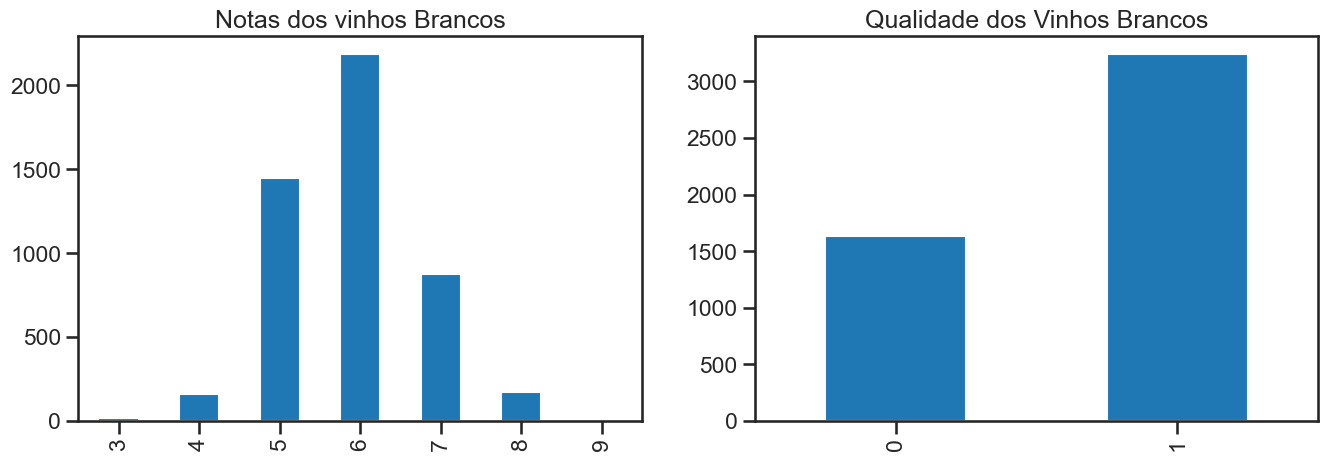

In [61]:
# Modelo para vinhos brancos (white wines) - como foi pedido apenas vinhos brancos, retiramos os vinhos vermelhos

white_wines = wines[wines.type == 'white'].reset_index().drop('index', axis=1)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
ax = plt.subplot(121)
white_wines.quality.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title('Notas dos vinhos Brancos')
ax = plt.subplot(122)
white_wines.opinion.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title('Qualidade dos Vinhos Brancos');

In [62]:
# Descrição das variáveis

white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029,0.665298
std,0.843444,0.100528,0.120915,5.070853,0.021846,17.012967,42.490515,0.002993,0.150902,0.114196,1.231251,0.885699,0.471935
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993735,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


| **Variável**         |  **Tipo**  | **Valor Médio** | **Desvio Padrão** |
|----------------------|:----------:|:---------------:|:-----------------:|
| type                 | Categórica |        -        |         -         |
| fixed acidity        |  Contínua  |       6.85      |        0.84       |
| volatile acidity     |  Contínua  |       0.27      |        0.10       |
| citric acid          |  Contínua  |       0.33      |        0.12       |
| residual sugar       |  Contínua  |       6.39      |        5.07       |
| chlorides            |  Contínua  |       0.04      |        0.02       |
| free sulfur dioxide  |  Contínua  |       35.3      |       17.01       |
| total sulfur dioxide |  Contínua  |      138.34     |       42.49       |
| density              |  Contínua  |       0.99      |       0.0029      |
| pH                   |  Contínua  |       3.18      |        0.15       |
| sulphates            |  Contínua  |       0.48      |        0.11       |
| quality              | Categórica |        -        |         -         |
| opinion              | Categórica |        -        |         -         |

In [63]:
# Organizando dados para ficar apenas as features (variáveis contínuas)

white_wines = white_wines.drop(columns=['type', 'quality'])
features = white_wines.columns.drop('opinion')
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

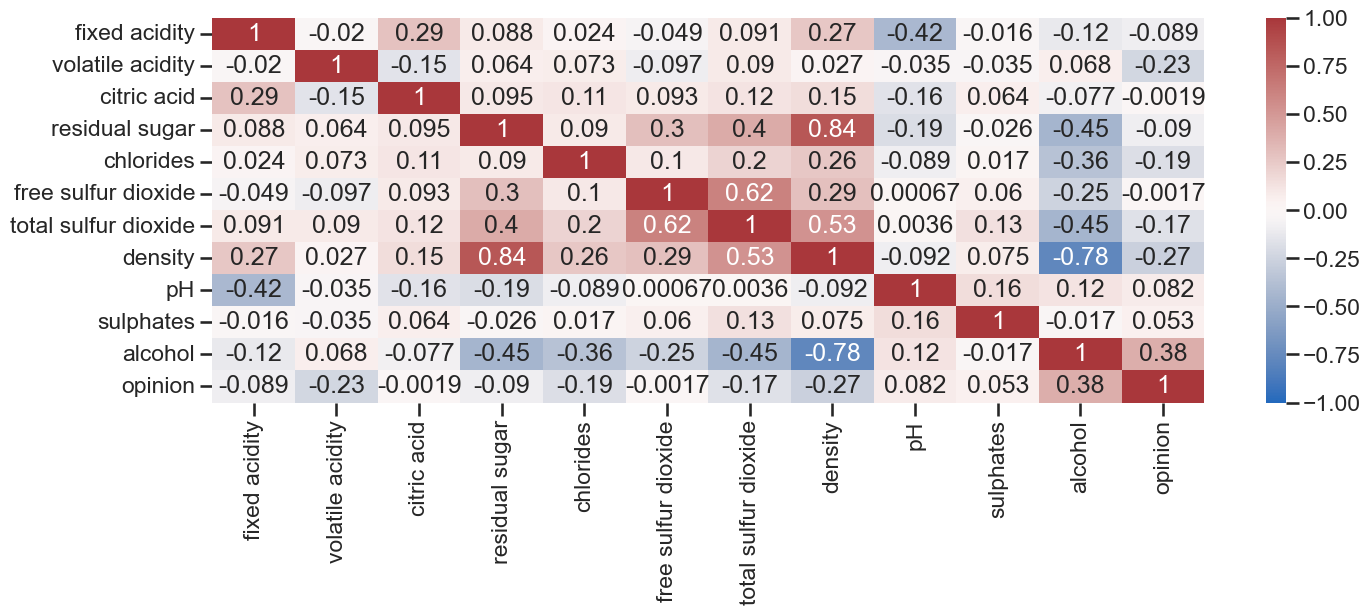

In [64]:
# Analisando as correlações entre as variáveis contínuas

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(white_wines.corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap='vlag');

In [65]:
g = sns.PairGrid(white_wines, hue='opinion')
g.map_lower(sns.regplot)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot);

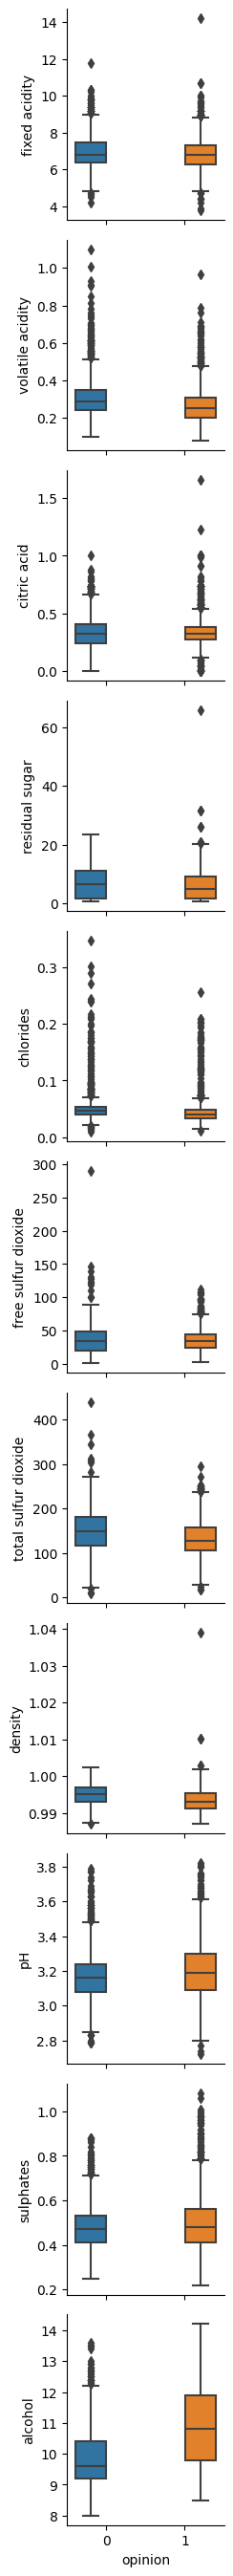

In [ ]:
# Checando Outliers com Boxplot - não há nenhum muito gritante

g = sns.PairGrid(white_wines, hue='opinion', x_vars='opinion')
g.map(sns.boxplot);

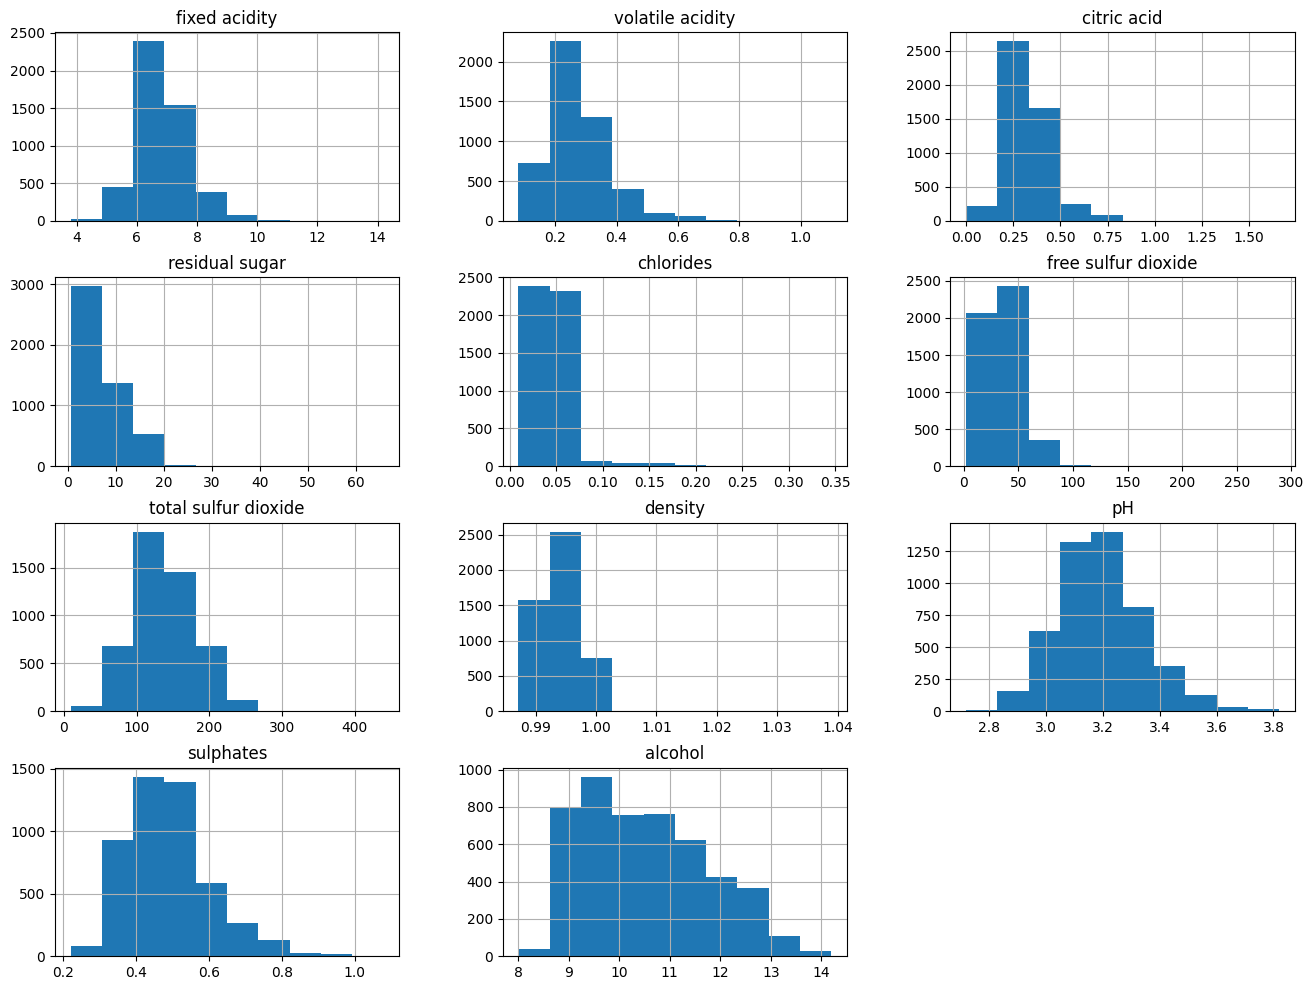

In [ ]:
# Analisando distribuição das variáveis com histogramas

white_wines[features].hist(figsize=(16, 12));

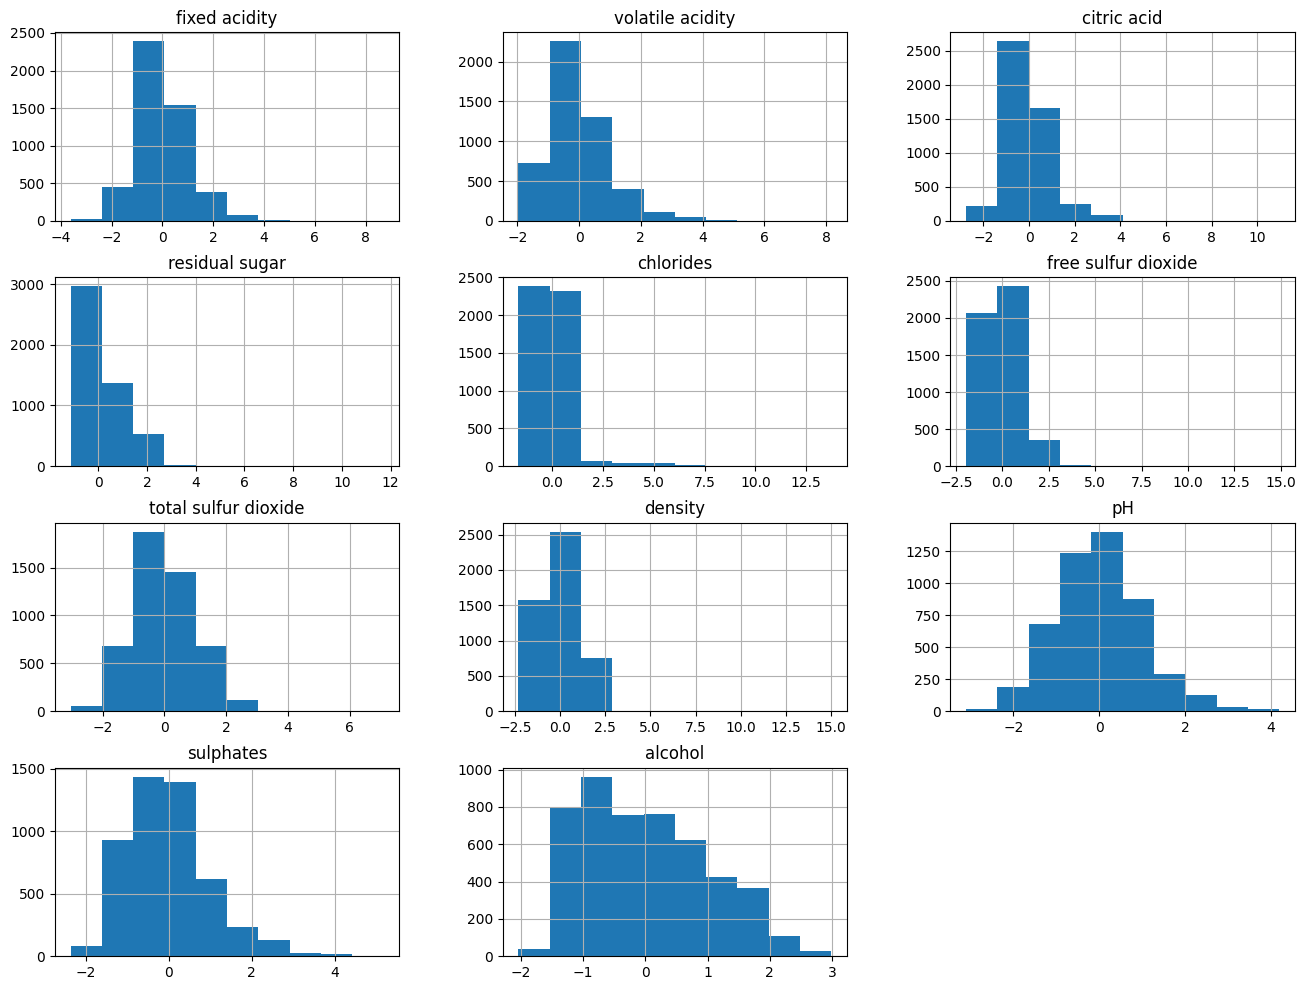

In [ ]:
# Escalonando com StandardScaler (ss)

df_ss = white_wines.copy()
ss = StandardScaler()
df_ss[features] = ss.fit_transform(white_wines[features])
df_ss[features].hist(figsize=(16,12));

C:\Users\Fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\paretochart\paretochart.py:198: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yt)


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
fixed acidity,0.156807,-0.586715,0.128982,0.032206,0.245284,0.105878,-0.200063,0.568050,0.362193,0.137510,-0.001101
volatile acidity,0.009469,0.041054,-0.600492,0.262179,0.638486,-0.095564,0.272563,0.016690,-0.112103,0.203742,-0.152396
citric acid,0.142362,-0.338542,0.501410,0.177869,0.048582,-0.131000,0.704807,-0.135527,-0.214305,0.032896,-0.018081
residual sugar,0.424859,0.008972,-0.183148,-0.297854,0.013069,0.293808,0.212858,-0.404342,0.372568,-0.066528,0.130690
chlorides,0.213394,-0.010190,-0.131626,0.682912,-0.338649,-0.401122,-0.079322,-0.142295,0.406764,-0.040571,0.028342
free sulfur dioxide,0.297051,0.296314,0.288142,-0.282421,0.201516,-0.491878,-0.166277,-0.074575,0.101365,0.577796,0.019107
total sulfur dioxide,0.404966,0.245760,0.123673,-0.042399,0.302837,-0.270052,-0.064986,0.246376,-0.109847,-0.718081,0.004243
density,0.510587,0.004957,-0.117580,-0.038118,-0.092970,0.326720,0.108363,0.059312,0.100350,0.067568,-0.022135
pH,-0.127702,0.582522,0.110817,0.109007,-0.129341,0.190603,0.423009,0.523518,0.282179,0.118946,0.017826
sulphates,0.042239,0.224481,0.411649,0.473217,0.371391,0.490529,-0.312507,-0.265593,-0.037273,0.060840,0.028500


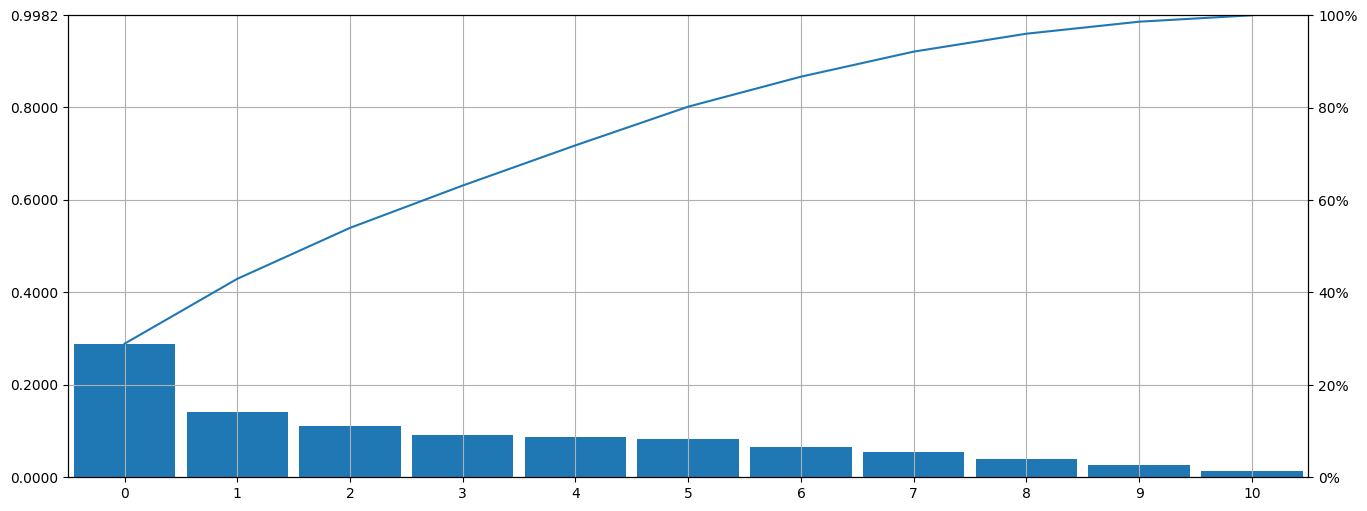

In [ ]:
# Usando PCA / Pareto (Com 7 variáveis já ultrapassa 95%, poderia ser válido reduzir a dimensionalidade para 7.)

# !pip install rogeriopradoj-paretochart

from sklearn.decomposition import PCA
from paretochart.paretochart import pareto

pca= PCA(n_components=11)
pca.fit(df_ss)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
pareto(pca.explained_variance_ratio_)
ax.grid()

pd.DataFrame(pca.components_.T, columns=[f'PC{d}' for d in range(11)], index=df_ss.columns)

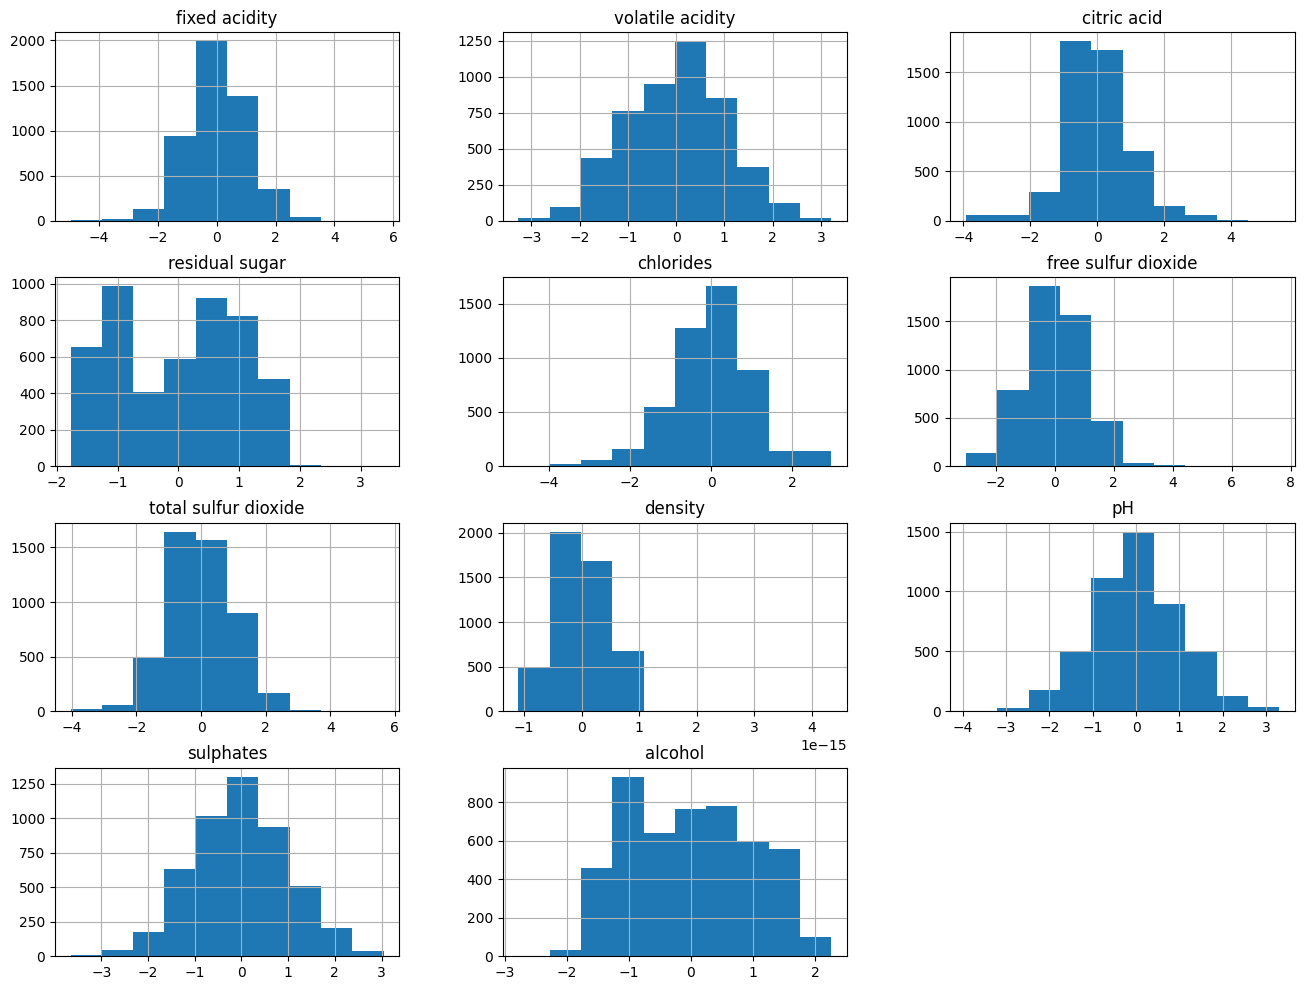

In [ ]:
# Escalonando com PowerTransformer (pt) - Apply a power transform featurewise to make data more Gaussian-like

df_pt = white_wines.copy()
pt = PowerTransformer()
df_pt[features] = pt.fit_transform(white_wines[features])
df_pt[features].hist(figsize=(16,12));

Agora defina o modelo de redes neural do tipo MLP que você irá utilizar. Essa é a fase de MODELAGEM:
Quantas camadas?
Quantos neurônios na camada de entrada?
Quantos neurônios na camada de saída? Justifique.
Quantos números de neurônios na camada intermediária? Como esse número foi escolhido?

RESPONDENDO:

Como são 11 features, serão 11 neurõnios na primeira camada (camada de entrada). 
Na última camada, sempre é apenas um neurônio, pois é assim que funciona toda rede neural. 
O número de neurônios na camada intermediária escolhemos usando o gráfico abaixo, de forma a maximizar o resultado de F1 Score
mas sem overtraining: 26 neurônios.


In [ ]:
# Com todos os dados preparados, iniciamos redes neurais

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold)
from sklearn.metrics import (f1_score,
                             ConfusionMatrixDisplay,
                             classification_report)

# Neural network
from sklearn.neural_network import MLPClassifier

In [ ]:
wines['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [ ]:
wines[features]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
wines['opinion']

0       1
1       1
2       1
3       1
4       1
       ..
6491    1
6492    0
6494    1
6495    0
6496    1
Name: opinion, Length: 6463, dtype: int64

In [ ]:
X = wines[features].values
y = wines['opinion'].values

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X,
                                                          y,
                                                          test_size=0.2, # 20 % da base
                                                          random_state=42,
                                                          stratify=y)

In [ ]:
X_train_cv

array([[ 7.3  ,  0.17 ,  0.23 , ...,  3.36 ,  0.54 , 10.   ],
       [10.9  ,  0.32 ,  0.52 , ...,  3.28 ,  0.77 , 11.5  ],
       [ 6.2  ,  0.26 ,  0.32 , ...,  3.31 ,  0.61 ,  9.4  ],
       ...,
       [ 6.1  ,  0.22 ,  0.49 , ...,  3.3  ,  0.46 ,  9.6  ],
       [ 8.6  ,  0.265,  0.36 , ...,  2.95 ,  0.36 , 11.4  ],
       [ 6.3  ,  0.25 ,  0.23 , ...,  3.14 ,  0.35 ,  9.7  ]])

In [ ]:
mlp = MLPClassifier(random_state=42)

In [ ]:

def train(X, y, model_klass, n_splits=5, n_init=1, **kwargs):
    cv = StratifiedKFold(n_splits=n_splits)
    f1_score_val_list = []
    f1_score_train_list = []
    model_list =[]
    scaler_list = []
    # Validação cruzada só em Training Data
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val = X[val_idx, :]
        y_val = y[val_idx]

        # Escala
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        scaler_list.append(scaler)
        # TO DO - Fazer a PCA como opcional
        # Treino
        model = None
        f1_score_val = 0.
        for idx in range(n_init):
            _model = model_klass(**kwargs)
            _model.fit(X_train_scaled, y_train)
            _y_pred = _model.predict(X_train_scaled)
            _y_pred_val = _model.predict(X_val_scaled)
            _f1_score_val = f1_score(y_val, _y_pred_val)
            if _f1_score_val > f1_score_val:
                y_pred_val = _y_pred_val
                y_pred = _y_pred
                model = _model
        print(f"========================= FOLD {fold} ==========================")
        print(f"Meu resultado para treino de F1-Score é {f1_score(y_train, y_pred):.2}")
        print(f"Meu resultado para validação de F1-Score é {f1_score(y_val, y_pred_val):.2}")
        f1_score_val_list.append(f1_score(y_val, y_pred_val))
        f1_score_train_list.append(f1_score(y_train, y_pred))
        model_list.append(model)
    print()
    print()
    mean_val = np.mean(f1_score_val_list)
    std_val = np.std(f1_score_val_list)
    print(f"Meu resultado de F1-Score Médio de treino é {np.mean(f1_score_train_list): .2} +- {np.std(f1_score_train_list): .2} ")
    print(f"Meu resultado de F1-Score Médio de validação é {mean_val: .2} +- {std_val: .2} ")
    print()

    best_model_idx = np.argmax(f1_score_val_list)
    print(f"Meu melhor fold é: {best_model_idx} ")
    best_model = model_list[best_model_idx]
    best_scaler = scaler_list[best_model_idx]
    return best_model, mean_val, std_val, best_scaler

In [ ]:
nn_results =[]
for neurons in range(1, 30):
    nn_model, nn_mean_val, nn_std_val, nn_scaler = train(X_train_cv, y_train_cv,
                                                         MLPClassifier,
                                                         hidden_layer_sizes=(neurons,),
                                                         n_init=10,
                                                         max_iter=10000,
                                                         activation="logistic", # Aqui a função de ativação é sigmóide ou lógística
                                                         alpha=1e-5,
                                                         tol=1e-3,
                                                         learning_rate_init=.3,
                                                         solver='sgd')

    nn_results.append((f"Neural Network ({neurons} neurons)", nn_mean_val, nn_std_val))

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.81
Meu resultado para validação de F1-Score é 0.79
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.8
Meu resultado para validação de F1-Score é 0.79
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.8
Meu resultado para validação de F1-Score é 0.8
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.8
Meu resultado para validação de F1-Score é 0.81
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.79
Meu resultado para validação de F1-Score é 0.79


Meu resultado de F1-Score Médio de treino é  0.8 +-  0.0042 
Meu resultado de F1-Score Médio de validação é  0.8 +-  0.0071 

Meu melhor fold é: 3 
========================= FOLD 0 ==========================
Meu resultado para treino de 

![Alt text](confusion%20matrix.jpeg)

In [ ]:
sns.set_style("ticks")
sns.set_context("talk")
plt.errorbar(range(1, 30), results["mean f1"], results["std f1"])
plt.grid(True)
sns.despine(offset=5)
plt.ylim([ 0.71 , 0.765])
plt.ylabel("Mean F1 Score ")
plt.xlabel("N Neurons")

TypeError: list indices must be integers or slices, not str

Qual será o algoritmo utilizado no treinamento?
Qual a função de ativação será utilizada em cada camada? Justifique.
Qual a função de otimização será utilizada neste treinamento?
Quais serão as figuras de métrica que serão usadas na avaliação do modelo. Justifique.
Apresente os seguintes resultados:
A matriz de confusão do problema
O(s) histograma(s) da(s) saída(s) da rede neural
Os valores das figuras de métrica utilizadas.
Caso tenha utilizado validação cruzada no treino, apresente as incertezas para cada um dos resultados anteriores.
Avalie os resultados, dando sua interpretação de acordo com a compreensão da natureza do problema proposto. Essa é a fase de 
AVALIAÇÃO DO MODELO.

RESPONDENDO:


A função logística, ou sigmoide, pode ser uma escolha adequada para um problema de classificação binária com 26 neurônios. A função logística mapeia os valores de entrada para um intervalo entre 0 e 1, o que permite interpretar a saída como a probabilidade de pertencer à classe positiva.

Ao utilizar a função logística como função de ativação para os neurônios de saída, você pode interpretar os valores de saída como a probabilidade de uma amostra pertencer à classe positiva. Um valor próximo de 0 indica uma alta probabilidade de pertencer à classe negativa, enquanto um valor próximo de 1 indica uma alta probabilidade de pertencer à classe positiva.

No entanto, é importante considerar que a função logística pode apresentar um problema conhecido como "vanishing gradient" em redes neurais profundas, onde os gradientes podem diminuir significativamente à medida que são propagados para as camadas anteriores, dificultando o aprendizado eficiente. Nesse caso, outras funções de ativação, como a função ReLU, podem ser preferíveis para as camadas ocultas da rede.

Em resumo, a função logística pode ser usada como função de ativação para os neurônios de saída em um problema de classificação binária com 26 neurônios, mas é importante considerar a utilização de outras funções de ativação, como a função ReLU, para as camadas ocultas, dependendo da complexidade da sua rede neural.

In [ ]:
n_neurons = 24

X_test_scaled = results.scaler[n_neurons - 1].transform(X_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, results.model[n_neurons - 1].predict(X_test_scaled))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

AttributeError: 'list' object has no attribute 'scaler'

OBS.: Com outros valores de neurons, as Confusion Matrix foram:

24:
Confusion matrix:
[[317 158]
 [146 672]]

16:
Confusion matrix:
[[315 160]
 [158 660]]

23:
Confusion matrix:
[[285 190]
 [112 706]]

26:
Confusion matrix:
[[304 171]
[127 691]]

In [ ]:
print(classification_report(y_test, results.model[n_neurons - 1].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       475
           1       0.80      0.84      0.82       818

    accuracy                           0.77      1293
   macro avg       0.75      0.74      0.75      1293
weighted avg       0.77      0.77      0.77      1293



In [ ]:
from sklearn.linear_model import LogisticRegression

logit, logit_mean_val, logit_std_val, logit_scaler = train(X_train_cv, y_train_cv, LogisticRegression, solver='newton-cg')

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.7
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.71
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.71
Meu resultado para validação de F1-Score é 0.71
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.71
Meu resultado para validação de F1-Score é 0.72
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.71
Meu resultado para validação de F1-Score é 0.71


Meu resultado de F1-Score Médio de treino é  0.71 +-  0.0039 
Meu resultado de F1-Score Médio de validação é  0.71 +-  0.0053 

Meu melhor fold é: 3 


In [ ]:
pd.DataFrame(logit.predict_proba(X_test_scaled))

,0,1
0,0.313238,0.686762
1,0.052954,0.947046
2,0.073718,0.926282
3,0.528420,0.471580
4,0.211477,0.788523
...,...,...
1288,0.109647,0.890353
1289,0.263083,0.736917
1290,0.267792,0.732208
1291,0.650066,0.349934


In [ ]:
svm_rbf_model, svm_rbf_mean_val, svm_rbf_std_val, svm_rbf_scaler = train(X_train_cv,
                                                                         y_train_cv,
                                                                         SVC,
                                                                         gamma = 'auto',
                                                                         C= 1,
                                                                         kernel= 'rbf')

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.78
Meu resultado para validação de F1-Score é 0.74
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.78
Meu resultado para validação de F1-Score é 0.76
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.78
Meu resultado para validação de F1-Score é 0.75
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.79
Meu resultado para validação de F1-Score é 0.75
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.78
Meu resultado para validação de F1-Score é 0.73


Meu resultado de F1-Score Médio de treino é  0.78 +-  0.003 
Meu resultado de F1-Score Médio de validação é  0.75 +-  0.01 

Meu melhor fold é: 1 


In [ ]:
tree_model, tree_mean_val, tree_std_val, tree_scaler  = train(X_train_cv, y_train_cv, DecisionTreeClassifier)

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.73
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.73
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.75
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.76
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.75


Meu resultado de F1-Score Médio de treino é  1.0 +-  0.0 
Meu resultado de F1-Score Médio de validação é  0.74 +-  0.01 

Meu melhor fold é: 3 


In [ ]:
results = [
    ('Logistic Regression', logit_mean_val, logit_std_val),
    ('Decision Tree', tree_mean_val, tree_std_val),
        ('SVM - RBF', svm_rbf_mean_val, svm_rbf_std_val),
] + nn_results

results = pd.DataFrame(results, columns=['Model', 'Validation F1', 'Validation F1 deviation'])
results.set_index('Model', inplace=True)

In [ ]:
results

,Validation F1,Validation F1 deviation
Model,,
Logistic Regression,0.709616,0.005322
Decision Tree,0.743511,0.010492
SVM - RBF,0.746212,0.010471
Neural Network (1 neurons),0.796150,0.007112
Neural Network (2 neurons),0.808059,0.008561
Neural Network (3 neurons),0.810142,0.005045
Neural Network (4 neurons),0.806393,0.009093
Neural Network (5 neurons),0.806390,0.013057
Neural Network (6 neurons),0.816715,0.005406


Melhor resultado: rede neural com 24 neurônios (menor erro)